In [1]:
import sys
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install IPython
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install matplotlib

You should consider upgrading via the '/home/ystein/Dokumenter/Master/jupyter/environment/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ystein/Dokumenter/Master/jupyter/environment/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ystein/Dokumenter/Master/jupyter/environment/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ystein/Dokumenter/Master/jupyter/environment/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ystein/Dokumenter/Master/jupyter/environment/bin/python -m pip install --upgrade pip' command.


In [2]:
import os
import pandas as pd
import numpy as np

from tsfresh import extract_features
from tsfresh.feature_extraction import MinimalFCParameters
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

from matplotlib import pyplot as plt


In [3]:
input_dir_path = '../analysis/ready_group/width_wise/All/all/'

In [4]:
filename = "final.csv"
input_df = pd.read_csv(os.path.join(input_dir_path, filename))
Y = input_df[["window",'ID','success','success_categorical']].copy()

input_df.drop("success_categorical", inplace=True, axis=1)
input_df.drop("success", inplace=True, axis=1)
display(input_df)


,window,ID,user_2_num_fixations,user_2_fixation_ratio,user_2_fixation_durations_mean,user_2_fixation_durations_median,user_2_fixation_durations_min,user_2_fixation_durations_max,user_2_fixation_durations_std,user_2_fixation_dispersions_mean,...,surprised,time_diff,neutral_change,happy_change,sad_change,angry_change,fearful_change,disgusted_change,surprised_change,time_diff_change
0,1.0,f10031,142.0,0.258652,140.425946,89.538574,18.950195,933.806885,145.537797,39.281922,...,0.001058,14.766104,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
1,2.0,f10031,136.0,0.291845,161.609962,93.777954,18.950195,1772.697998,218.578415,46.115280,...,0.001012,18.990136,-0.001627,0.001542,-0.000116,0.000067,7.948154e-07,1.792059e-04,-0.000046,4.224032
2,3.0,f10031,111.0,0.212237,173.819613,96.728027,18.950195,1772.697998,236.315603,50.217409,...,0.001002,24.440235,-0.050757,0.060207,-0.009528,0.000070,-3.268232e-08,1.818222e-05,-0.000010,5.450100
3,4.0,f10031,94.0,0.175373,191.474344,120.198486,20.920898,1772.697998,253.898080,56.490419,...,0.001101,29.721428,-0.035757,0.035753,-0.000032,-0.000078,1.070729e-06,1.332743e-05,0.000099,5.281192
4,5.0,f10031,84.0,0.171779,212.406238,145.857910,21.939941,1772.697998,265.778521,60.947407,...,0.001073,34.808612,-0.072987,0.073023,-0.000005,-0.000027,1.648964e-06,2.159010e-05,-0.000028,5.087184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5885,63.0,f10006,237.0,0.279152,73.593671,48.973877,17.952148,534.600830,70.110923,22.753659,...,0.004797,324.911382,-0.017148,-0.000051,0.017036,-0.000008,-7.047028e-08,-2.662790e-07,0.000170,4.969743
5886,64.0,f10006,231.0,0.286600,77.907588,47.848145,17.952148,1033.776123,95.532309,26.949262,...,0.004870,329.912501,0.011785,-0.002855,-0.009012,0.000043,-3.716472e-05,3.091413e-06,0.000072,5.001119
5887,65.0,f10006,224.0,0.284264,81.282426,51.088867,17.952148,1033.776123,96.210971,28.187855,...,0.018790,334.948692,-0.078595,0.062743,0.001859,0.000043,1.170641e-05,1.904388e-05,0.013920,5.036191
5888,66.0,f10006,200.0,0.298063,98.499094,57.062134,17.952148,1192.486084,139.831733,30.458274,...,0.027211,339.810184,0.019549,0.001163,-0.029053,-0.000058,-2.348487e-05,2.853321e-07,0.008421,4.861492


In [5]:
input_df = input_df.loc[:, ~input_df.columns.str.endswith('min')]
input_df = input_df.loc[:, ~input_df.columns.str.endswith('median')]
input_df = input_df.loc[:, ~input_df.columns.str.endswith('max')]
input_df = input_df.loc[:, ~input_df.columns.str.startswith('window.')]
input_df['ID'] = input_df['ID'].str.replace(r'^f', '9', regex=True)


display(input_df)

,window,ID,user_2_num_fixations,user_2_fixation_ratio,user_2_fixation_durations_mean,user_2_fixation_durations_std,user_2_fixation_dispersions_mean,user_2_fixation_dispersions_std,user_2_num_saccades,user_2_saccade_mean_distance,...,surprised,time_diff,neutral_change,happy_change,sad_change,angry_change,fearful_change,disgusted_change,surprised_change,time_diff_change
0,1.0,910031,142.0,0.258652,140.425946,145.537797,39.281922,64.722229,407.0,102.470916,...,0.001058,14.766104,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
1,2.0,910031,136.0,0.291845,161.609962,218.578415,46.115280,107.730445,330.0,107.939090,...,0.001012,18.990136,-0.001627,0.001542,-0.000116,0.000067,7.948154e-07,1.792059e-04,-0.000046,4.224032
2,3.0,910031,111.0,0.212237,173.819613,236.315603,50.217409,118.597660,412.0,126.752343,...,0.001002,24.440235,-0.050757,0.060207,-0.009528,0.000070,-3.268232e-08,1.818222e-05,-0.000010,5.450100
3,4.0,910031,94.0,0.175373,191.474344,253.898080,56.490419,128.274834,442.0,131.650923,...,0.001101,29.721428,-0.035757,0.035753,-0.000032,-0.000078,1.070729e-06,1.332743e-05,0.000099,5.281192
4,5.0,910031,84.0,0.171779,212.406238,265.778521,60.947407,135.024030,405.0,133.101932,...,0.001073,34.808612,-0.072987,0.073023,-0.000005,-0.000027,1.648964e-06,2.159010e-05,-0.000028,5.087184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5885,63.0,910006,237.0,0.279152,73.593671,70.110923,22.753659,64.052163,612.0,54.441640,...,0.004797,324.911382,-0.017148,-0.000051,0.017036,-0.000008,-7.047028e-08,-2.662790e-07,0.000170,4.969743
5886,64.0,910006,231.0,0.286600,77.907588,95.532309,26.949262,87.341035,575.0,56.370294,...,0.004870,329.912501,0.011785,-0.002855,-0.009012,0.000043,-3.716472e-05,3.091413e-06,0.000072,5.001119
5887,65.0,910006,224.0,0.284264,81.282426,96.210971,28.187855,88.576113,564.0,61.779183,...,0.018790,334.948692,-0.078595,0.062743,0.001859,0.000043,1.170641e-05,1.904388e-05,0.013920,5.036191
5888,66.0,910006,200.0,0.298063,98.499094,139.831733,30.458274,93.507148,471.0,65.755164,...,0.027211,339.810184,0.019549,0.001163,-0.029053,-0.000058,-2.348487e-05,2.853321e-07,0.008421,4.861492


In [6]:
#input_df['window_id'] = input_df['window'].astype(str) + '_' + input_df['ID'].astype(str)
input_df['window_id'] = input_df['ID'].astype(str) + '_' + input_df['window'].astype(int).apply(lambda x: f'{x:04d}')
#input_df.drop('ID', inplace=True, axis=1)
display(input_df)
#print(input_df.dtypes)


,window,ID,user_2_num_fixations,user_2_fixation_ratio,user_2_fixation_durations_mean,user_2_fixation_durations_std,user_2_fixation_dispersions_mean,user_2_fixation_dispersions_std,user_2_num_saccades,user_2_saccade_mean_distance,...,time_diff,neutral_change,happy_change,sad_change,angry_change,fearful_change,disgusted_change,surprised_change,time_diff_change,window_id
0,1.0,910031,142.0,0.258652,140.425946,145.537797,39.281922,64.722229,407.0,102.470916,...,14.766104,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,910031_0001
1,2.0,910031,136.0,0.291845,161.609962,218.578415,46.115280,107.730445,330.0,107.939090,...,18.990136,-0.001627,0.001542,-0.000116,0.000067,7.948154e-07,1.792059e-04,-0.000046,4.224032,910031_0002
2,3.0,910031,111.0,0.212237,173.819613,236.315603,50.217409,118.597660,412.0,126.752343,...,24.440235,-0.050757,0.060207,-0.009528,0.000070,-3.268232e-08,1.818222e-05,-0.000010,5.450100,910031_0003
3,4.0,910031,94.0,0.175373,191.474344,253.898080,56.490419,128.274834,442.0,131.650923,...,29.721428,-0.035757,0.035753,-0.000032,-0.000078,1.070729e-06,1.332743e-05,0.000099,5.281192,910031_0004
4,5.0,910031,84.0,0.171779,212.406238,265.778521,60.947407,135.024030,405.0,133.101932,...,34.808612,-0.072987,0.073023,-0.000005,-0.000027,1.648964e-06,2.159010e-05,-0.000028,5.087184,910031_0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5885,63.0,910006,237.0,0.279152,73.593671,70.110923,22.753659,64.052163,612.0,54.441640,...,324.911382,-0.017148,-0.000051,0.017036,-0.000008,-7.047028e-08,-2.662790e-07,0.000170,4.969743,910006_0063
5886,64.0,910006,231.0,0.286600,77.907588,95.532309,26.949262,87.341035,575.0,56.370294,...,329.912501,0.011785,-0.002855,-0.009012,0.000043,-3.716472e-05,3.091413e-06,0.000072,5.001119,910006_0064
5887,65.0,910006,224.0,0.284264,81.282426,96.210971,28.187855,88.576113,564.0,61.779183,...,334.948692,-0.078595,0.062743,0.001859,0.000043,1.170641e-05,1.904388e-05,0.013920,5.036191,910006_0065
5888,66.0,910006,200.0,0.298063,98.499094,139.831733,30.458274,93.507148,471.0,65.755164,...,339.810184,0.019549,0.001163,-0.029053,-0.000058,-2.348487e-05,2.853321e-07,0.008421,4.861492,910006_0066


In [7]:
mapping = {'high': 1, 'low': 0}

Y['success_categorical'] = Y['success_categorical'].map(mapping)
Y['ID'] = Y['ID'].str.replace(r'^f', '9', regex=True)

Y['window_id'] = Y['ID'].astype(str) + '_' + Y['window'].astype(int).apply(lambda x: f'{x:04d}')
Y.drop('window', inplace=True, axis=1)

display(Y)

,ID,success,success_categorical,window_id
0,910031,5,1,910031_0001
1,910031,5,1,910031_0002
2,910031,5,1,910031_0003
3,910031,5,1,910031_0004
4,910031,5,1,910031_0005
...,...,...,...,...
5885,910006,3,0,910006_0063
5886,910006,3,0,910006_0064
5887,910006,3,0,910006_0065
5888,910006,3,0,910006_0066


In [8]:
def split_ordered_data(df, percent):
    unique_ids = df['ID'].unique()
    dfs = []  
    for id in unique_ids:
        sub_df = df[df['ID'] == id]
        n = len(sub_df)

        sub_df_sample = sub_df[:int(n * percent / 100)]
        dfs.append(sub_df_sample)
    return dfs  

In [9]:
dfs_90 = split_ordered_data(input_df, 90)
df_90 = pd.concat(dfs_90)
df_90.drop("ID", inplace=True, axis=1)


Y_90s = split_ordered_data(Y, 90)
Y_90 = pd.concat(Y_90s)
Y_90.drop("ID", inplace=True, axis=1)
Y_90.set_index('window_id')

dfs_80 = split_ordered_data(input_df, 80)
df_80 = pd.concat(dfs_80)
df_80.drop("ID", inplace=True, axis=1)

Y_80s = split_ordered_data(Y, 80)
Y_80 = pd.concat(Y_80s)
Y_80.drop("ID", inplace=True, axis=1)
Y_80.set_index('window_id')

dfs_70 = split_ordered_data(input_df, 70)
df_70 = pd.concat(dfs_70)
df_70.drop("ID", inplace=True, axis=1)

Y_70s = split_ordered_data(Y, 70)
Y_70 = pd.concat(Y_70s)
Y_70.drop("ID", inplace=True, axis=1)
Y_70.set_index('window_id')


dfs_60 = split_ordered_data(input_df, 60)
df_60 = pd.concat(dfs_60)
df_60.drop("ID", inplace=True, axis=1)

Y_60s = split_ordered_data(Y, 60)
Y_60 = pd.concat(Y_60s)
Y_60.drop("ID", inplace=True, axis=1)
Y_60.set_index('window_id')

dfs_50 = split_ordered_data(input_df, 50)
df_50 = pd.concat(dfs_50)
df_50.drop("ID", inplace=True, axis=1)

Y_50s = split_ordered_data(Y, 50)
Y_50 = pd.concat(Y_50s)
Y_50.drop("ID", inplace=True, axis=1)
Y_50.set_index('window_id')

dfs_40 = split_ordered_data(input_df, 40)
df_40 = pd.concat(dfs_40)
df_40.drop("ID", inplace=True, axis=1)

Y_40s = split_ordered_data(Y, 40)
Y_40 = pd.concat(Y_40s)
Y_40.drop("ID", inplace=True, axis=1)
Y_40.set_index('window_id')

dfs_30 = split_ordered_data(input_df, 30)
df_30 = pd.concat(dfs_30)
df_30.drop("ID", inplace=True, axis=1)

Y_30s = split_ordered_data(Y, 30)
Y_30 = pd.concat(Y_30s)
Y_30.drop("ID", inplace=True, axis=1)
Y_30.set_index('window_id')

dfs_20 = split_ordered_data(input_df, 20)
df_20 = pd.concat(dfs_20)
df_20.drop("ID", inplace=True, axis=1)

Y_20s = split_ordered_data(Y, 20)
Y_20 = pd.concat(Y_20s)
Y_20.drop("ID", inplace=True, axis=1)
Y_20.set_index('window_id')

dfs_10 = split_ordered_data(input_df, 10)
df_10 = pd.concat(dfs_10)
df_10.drop("ID", inplace=True, axis=1)

Y_10s = split_ordered_data(Y, 10)
Y_10 = pd.concat(Y_10s)
Y_10.drop("ID", inplace=True, axis=1)
Y_10.set_index('window_id')


,success,success_categorical
window_id,,
910031_0001,5,1
910031_0002,5,1
910031_0003,5,1
910031_0004,5,1
910031_0005,5,1
...,...,...
910006_0002,3,0
910006_0003,3,0
910006_0004,3,0


In [10]:
input_df.drop("ID", inplace=True, axis=1)


In [11]:
settings = MinimalFCParameters()

extracted_100 = extract_features(input_df, column_id="window_id", default_fc_parameters=settings)
extracted_90 = extract_features(df_90, column_id="window_id", default_fc_parameters=settings)
extracted_80 = extract_features(df_80, column_id="window_id", default_fc_parameters=settings)
extracted_70 = extract_features(df_70, column_id="window_id", default_fc_parameters=settings)
extracted_60 = extract_features(df_60, column_id="window_id", default_fc_parameters=settings)
extracted_50 = extract_features(df_50, column_id="window_id", default_fc_parameters=settings)
extracted_40 = extract_features(df_40, column_id="window_id", default_fc_parameters=settings)
extracted_30 = extract_features(df_30, column_id="window_id", default_fc_parameters=settings)
extracted_20 = extract_features(df_20, column_id="window_id", default_fc_parameters=settings)
extracted_10 = extract_features(df_10, column_id="window_id", default_fc_parameters=settings)


Feature Extraction: 100%|█████████████████| 20/20 [00:15<00:00,  1.28it/s]


In [12]:
extracted_100 = extracted_100.loc[:, ~extracted_100.columns.str.startswith('window')]
extracted_90 = extracted_90.loc[:, ~extracted_90.columns.str.startswith('window')]
extracted_80 = extracted_80.loc[:, ~extracted_80.columns.str.startswith('window')]
extracted_70 = extracted_70.loc[:, ~extracted_70.columns.str.startswith('window')]
extracted_60 = extracted_60.loc[:, ~extracted_60.columns.str.startswith('window')]
extracted_50 = extracted_50.loc[:, ~extracted_50.columns.str.startswith('window')]
extracted_40 = extracted_40.loc[:, ~extracted_40.columns.str.startswith('window')]
extracted_30 = extracted_30.loc[:, ~extracted_30.columns.str.startswith('window')]
extracted_20 = extracted_20.loc[:, ~extracted_20.columns.str.startswith('window')]
extracted_10 = extracted_10.loc[:, ~extracted_10.columns.str.startswith('window')]


,user_2_num_fixations__sum_values,user_2_num_fixations__median,user_2_num_fixations__mean,user_2_num_fixations__length,user_2_num_fixations__standard_deviation,user_2_num_fixations__variance,user_2_num_fixations__root_mean_square,user_2_num_fixations__maximum,user_2_num_fixations__absolute_maximum,user_2_num_fixations__minimum,...,time_diff_change__sum_values,time_diff_change__median,time_diff_change__mean,time_diff_change__length,time_diff_change__standard_deviation,time_diff_change__variance,time_diff_change__root_mean_square,time_diff_change__maximum,time_diff_change__absolute_maximum,time_diff_change__minimum
10006_0001,133.0,133.0,133.0,1.0,0.0,0.0,133.0,133.0,133.0,133.0,...,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
10006_0002,139.0,139.0,139.0,1.0,0.0,0.0,139.0,139.0,139.0,139.0,...,5.261168,5.261168,5.261168,1.0,0.0,0.0,5.261168,5.261168,5.261168,5.261168
10006_0003,162.0,162.0,162.0,1.0,0.0,0.0,162.0,162.0,162.0,162.0,...,4.597394,4.597394,4.597394,1.0,0.0,0.0,4.597394,4.597394,4.597394,4.597394
10006_0004,197.0,197.0,197.0,1.0,0.0,0.0,197.0,197.0,197.0,197.0,...,5.047498,5.047498,5.047498,1.0,0.0,0.0,5.047498,5.047498,5.047498,5.047498
10006_0005,210.0,210.0,210.0,1.0,0.0,0.0,210.0,210.0,210.0,210.0,...,5.211941,5.211941,5.211941,1.0,0.0,0.0,5.211941,5.211941,5.211941,5.211941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910081_0297,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.359453,2.359453,2.359453,1.0,0.0,0.0,2.359453,2.359453,2.359453,2.359453
910081_0298,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.530913,2.530913,2.530913,1.0,0.0,0.0,2.530913,2.530913,2.530913,2.530913
910081_0299,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.538340,2.538340,2.538340,1.0,0.0,0.0,2.538340,2.538340,2.538340,2.538340
910081_0300,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.600611,2.600611,2.600611,1.0,0.0,0.0,2.600611,2.600611,2.600611,2.600611


In [22]:
output_filename= f"extracted_test.csv"
extracted_100.to_csv(os.path.join(input_dir_path, "extracted_100.csv"), index=False)
extracted_90.to_csv(os.path.join(input_dir_path, "extracted_90.csv"), index=False)
extracted_80.to_csv(os.path.join(input_dir_path, "extracted_80.csv"), index=False)
extracted_70.to_csv(os.path.join(input_dir_path, "extracted_70.csv"), index=False)
extracted_60.to_csv(os.path.join(input_dir_path, "extracted_60.csv"), index=False)
extracted_50.to_csv(os.path.join(input_dir_path, "extracted_50.csv"), index=False)
extracted_40.to_csv(os.path.join(input_dir_path, "extracted_40.csv"), index=False)
extracted_30.to_csv(os.path.join(input_dir_path, "extracted_30.csv"), index=False)
extracted_20.to_csv(os.path.join(input_dir_path, "extracted_20.csv"), index=False)
extracted_10.to_csv(os.path.join(input_dir_path, "extracted_10.csv"), index=False)

In [23]:
extracted_100.replace([np.inf, -np.inf], np.nan, inplace=True)
impute(extracted_100)
extracted_90.replace([np.inf, -np.inf], np.nan, inplace=True)
impute(extracted_90)
extracted_80.replace([np.inf, -np.inf], np.nan, inplace=True)
impute(extracted_80)
extracted_70.replace([np.inf, -np.inf], np.nan, inplace=True)
impute(extracted_70)
extracted_60.replace([np.inf, -np.inf], np.nan, inplace=True)
impute(extracted_60)
extracted_50.replace([np.inf, -np.inf], np.nan, inplace=True)
impute(extracted_50)
extracted_40.replace([np.inf, -np.inf], np.nan, inplace=True)
impute(extracted_40)
extracted_30.replace([np.inf, -np.inf], np.nan, inplace=True)
impute(extracted_30)
extracted_20.replace([np.inf, -np.inf], np.nan, inplace=True)
impute(extracted_20)
extracted_10.replace([np.inf, -np.inf], np.nan, inplace=True)
impute(extracted_10)


,user_2_num_fixations__sum_values,user_2_num_fixations__median,user_2_num_fixations__mean,user_2_num_fixations__length,user_2_num_fixations__standard_deviation,user_2_num_fixations__variance,user_2_num_fixations__root_mean_square,user_2_num_fixations__maximum,user_2_num_fixations__absolute_maximum,user_2_num_fixations__minimum,...,time_diff_change__sum_values,time_diff_change__median,time_diff_change__mean,time_diff_change__length,time_diff_change__standard_deviation,time_diff_change__variance,time_diff_change__root_mean_square,time_diff_change__maximum,time_diff_change__absolute_maximum,time_diff_change__minimum
10006_0001,133.0,133.0,133.0,1.0,0.0,0.0,133.0,133.0,133.0,133.0,...,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
10006_0002,139.0,139.0,139.0,1.0,0.0,0.0,139.0,139.0,139.0,139.0,...,5.261168,5.261168,5.261168,1.0,0.0,0.0,5.261168,5.261168,5.261168,5.261168
10006_0003,162.0,162.0,162.0,1.0,0.0,0.0,162.0,162.0,162.0,162.0,...,4.597394,4.597394,4.597394,1.0,0.0,0.0,4.597394,4.597394,4.597394,4.597394
10006_0004,197.0,197.0,197.0,1.0,0.0,0.0,197.0,197.0,197.0,197.0,...,5.047498,5.047498,5.047498,1.0,0.0,0.0,5.047498,5.047498,5.047498,5.047498
10006_0005,210.0,210.0,210.0,1.0,0.0,0.0,210.0,210.0,210.0,210.0,...,5.211941,5.211941,5.211941,1.0,0.0,0.0,5.211941,5.211941,5.211941,5.211941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910081_0026,39.0,39.0,39.0,1.0,0.0,0.0,39.0,39.0,39.0,39.0,...,5.412861,5.412861,5.412861,1.0,0.0,0.0,5.412861,5.412861,5.412861,5.412861
910081_0027,28.0,28.0,28.0,1.0,0.0,0.0,28.0,28.0,28.0,28.0,...,4.787836,4.787836,4.787836,1.0,0.0,0.0,4.787836,4.787836,4.787836,4.787836
910081_0028,20.0,20.0,20.0,1.0,0.0,0.0,20.0,20.0,20.0,20.0,...,4.984704,4.984704,4.984704,1.0,0.0,0.0,4.984704,4.984704,4.984704,4.984704
910081_0029,17.0,17.0,17.0,1.0,0.0,0.0,17.0,17.0,17.0,17.0,...,5.192544,5.192544,5.192544,1.0,0.0,0.0,5.192544,5.192544,5.192544,5.192544


In [128]:
X_train, X_test, y_train, y_test = train_test_split(extracted_100, Y['success'], test_size=0.4)

In [129]:
rf_100 = RandomForestClassifier(n_estimators=100)
rf_100.fit(X_train, y_train)

RandomForestClassifier()

In [130]:
y_pred_100 = rf_100.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_100)
sorted_features = sorted(zip(extracted_100.columns, rf_100.feature_importances_), key=lambda x: x[1])

last_30_features = sorted_features[-30:][::-1]

print("{:<5s} | {:<30s} | {:<10s}".format("Rank", "Feature", "Importance"))

# Print the separator
print("-"*50)

# Print each feature
for i, (feature, importance) in enumerate(last_30_features, start=1):
    print("{:<5d} | {:<30s} | {:<10.6f}".format(i, feature, importance))

print(accuracy)

Rank  | Feature                        | Importance
--------------------------------------------------
1     | user_2_engagement_auc__minimum | 0.017053  
2     | user_2_engagement_auc__mean    | 0.016996  
3     | user_2_engagement_auc__median  | 0.016937  
4     | user_2_engagement_auc__maximum | 0.013635  
5     | user_2_engagement_auc__sum_values | 0.011836  
6     | user_2_engagement_auc__absolute_maximum | 0.011399  
7     | user_2_engagement_auc__root_mean_square | 0.010159  
8     | engagement_auc_mean__absolute_maximum | 0.010008  
9     | user_1_engagement_auc__mean    | 0.009450  
10    | engagement_auc_diff__mean      | 0.009404  
11    | engagement_auc_mean__sum_values | 0.008685  
12    | engagement_auc_mean__mean      | 0.008369  
13    | engagement_auc_diff__maximum   | 0.008212  
14    | engagement_auc_mean__maximum   | 0.007994  
15    | engagement_auc_diff__minimum   | 0.007580  
16    | user_2_engagement_amplitude__minimum | 0.007554  
17    | engagement_auc_mean__r

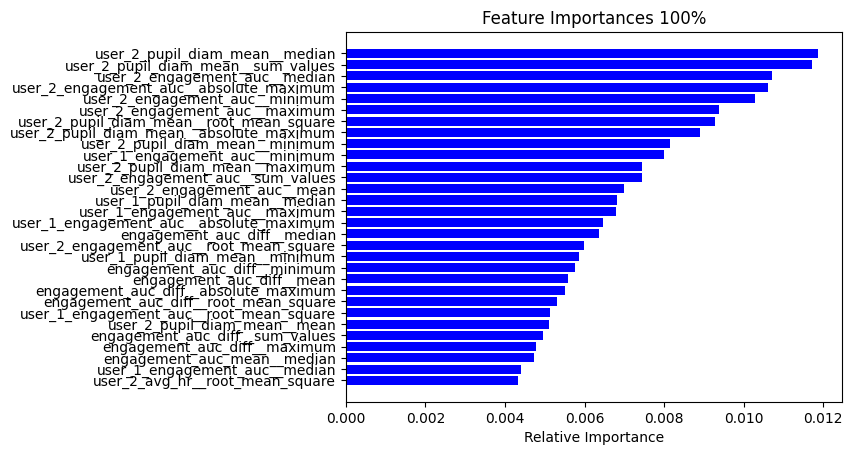

In [79]:
features = extracted_100.columns
importances = rf_100.feature_importances_

indices = np.argsort(importances)[-30:]

plt.title('Feature Importances 100%')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [134]:
X_train, X_test, y_train, y_test = train_test_split(extracted_90, Y_90['success'], test_size=0.4)

In [135]:
rf_90 = RandomForestClassifier(n_estimators=100)
rf_90.fit(X_train, y_train)

RandomForestClassifier()

In [136]:
y_pred_90 = rf_90.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_90)
sorted_features = sorted(zip(extracted_90.columns, rf_90.feature_importances_), key=lambda x: x[1])

last_30_features = sorted_features[-30:][::-1]

print("{:<5s} | {:<30s} | {:<10s}".format("Rank", "Feature", "Importance"))

# Print the separator
print("-"*50)

# Print each feature
for i, (feature, importance) in enumerate(last_30_features, start=1):
    print("{:<5d} | {:<30s} | {:<10.6f}".format(i, feature, importance))

print(accuracy)

Rank  | Feature                        | Importance
--------------------------------------------------
1     | user_2_engagement_auc__median  | 0.018435  
2     | user_2_engagement_auc__maximum | 0.017504  
3     | user_2_engagement_auc__minimum | 0.016394  
4     | user_2_engagement_auc__mean    | 0.014600  
5     | user_2_engagement_auc__sum_values | 0.014215  
6     | user_2_engagement_auc__root_mean_square | 0.012514  
7     | engagement_auc_mean__minimum   | 0.010272  
8     | engagement_auc_diff__absolute_maximum | 0.010080  
9     | engagement_auc_mean__maximum   | 0.009529  
10    | user_2_engagement_auc__absolute_maximum | 0.009362  
11    | engagement_auc_mean__absolute_maximum | 0.008983  
12    | engagement_auc_diff__mean      | 0.008965  
13    | engagement_auc_diff__minimum   | 0.008752  
14    | user_1_engagement_auc__sum_values | 0.008015  
15    | engagement_auc_mean__sum_values | 0.007808  
16    | user_1_engagement_auc__absolute_maximum | 0.007588  
17    | user_1_en

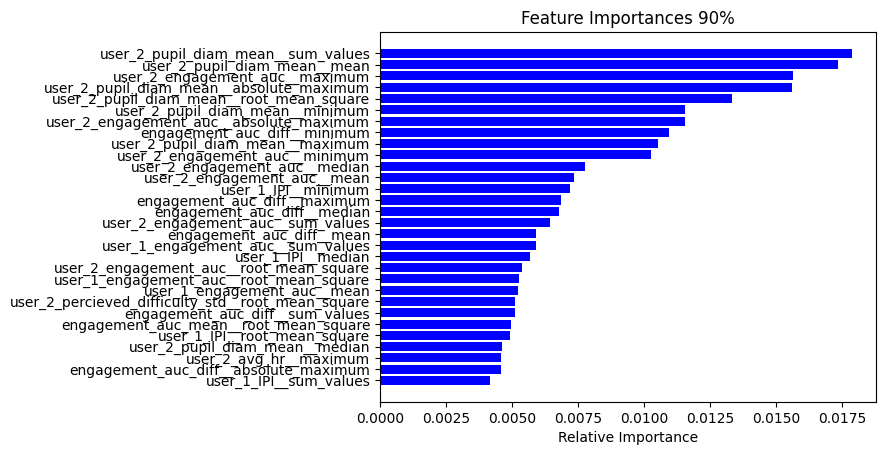

In [83]:
features = extracted_90.columns
importances = rf_90.feature_importances_

indices = np.argsort(importances)[-30:]

plt.title('Feature Importances 90%')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [140]:
X_train, X_test, y_train, y_test = train_test_split(extracted_80, Y_80['success'], test_size=0.4)

In [141]:
rf_80 = RandomForestClassifier(n_estimators=100)
rf_80.fit(X_train, y_train)

RandomForestClassifier()

In [142]:
y_pred_80 = rf_80.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_80)
sorted_features = sorted(zip(extracted_80.columns, rf_80.feature_importances_), key=lambda x: x[1])

last_30_features = sorted_features[-30:][::-1]

print("{:<5s} | {:<30s} | {:<10s}".format("Rank", "Feature", "Importance"))

# Print the separator
print("-"*50)

# Print each feature
for i, (feature, importance) in enumerate(last_30_features, start=1):
    print("{:<5d} | {:<30s} | {:<10.6f}".format(i, feature, importance))

print(accuracy)

Rank  | Feature                        | Importance
--------------------------------------------------
1     | user_2_engagement_auc__root_mean_square | 0.020588  
2     | user_2_engagement_auc__minimum | 0.014839  
3     | user_2_engagement_auc__maximum | 0.014782  
4     | user_2_engagement_auc__absolute_maximum | 0.013644  
5     | user_2_engagement_auc__mean    | 0.013074  
6     | user_2_engagement_auc__sum_values | 0.012357  
7     | user_2_engagement_auc__median  | 0.011719  
8     | engagement_auc_diff__median    | 0.010846  
9     | user_1_engagement_auc__root_mean_square | 0.009918  
10    | engagement_auc_diff__maximum   | 0.008790  
11    | engagement_auc_mean__maximum   | 0.007344  
12    | engagement_auc_diff__sum_values | 0.007232  
13    | user_1_engagement_auc__minimum | 0.007119  
14    | engagement_auc_diff__absolute_maximum | 0.007082  
15    | user_1_engagement_auc__absolute_maximum | 0.006934  
16    | engagement_auc_mean__root_mean_square | 0.006888  
17    | eng

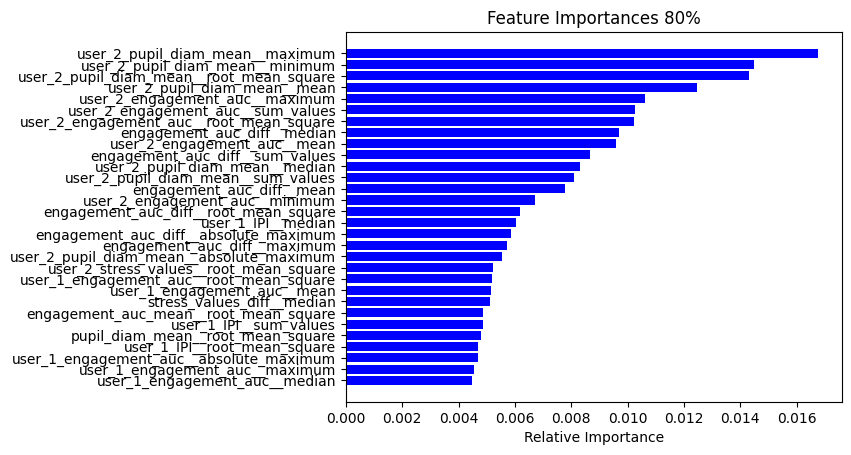

In [88]:
features = extracted_80.columns
importances = rf_80.feature_importances_

indices = np.argsort(importances)[-30:]

plt.title('Feature Importances 80%')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [146]:
X_train, X_test, y_train, y_test = train_test_split(extracted_70, Y_70['success'], test_size=0.4)

In [147]:
rf_70 = RandomForestClassifier(n_estimators=100)
rf_70.fit(X_train, y_train)

RandomForestClassifier()

In [148]:
y_pred_70 = rf_70.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_70)
sorted_features = sorted(zip(extracted_70.columns, rf_70.feature_importances_), key=lambda x: x[1])

last_30_features = sorted_features[-30:][::-1]

print("{:<5s} | {:<30s} | {:<10s}".format("Rank", "Feature", "Importance"))

# Print the separator
print("-"*50)

# Print each feature
for i, (feature, importance) in enumerate(last_30_features, start=1):
    print("{:<5d} | {:<30s} | {:<10.6f}".format(i, feature, importance))

print(accuracy)

Rank  | Feature                        | Importance
--------------------------------------------------
1     | user_2_engagement_auc__root_mean_square | 0.018650  
2     | user_2_engagement_auc__sum_values | 0.015699  
3     | user_2_engagement_auc__absolute_maximum | 0.015679  
4     | user_2_engagement_auc__minimum | 0.012262  
5     | user_2_engagement_auc__maximum | 0.010450  
6     | user_2_engagement_auc__mean    | 0.010172  
7     | engagement_auc_diff__root_mean_square | 0.008861  
8     | engagement_auc_diff__sum_values | 0.008234  
9     | user_1_engagement_auc__root_mean_square | 0.007820  
10    | engagement_auc_diff__absolute_maximum | 0.007583  
11    | user_1_engagement_auc__absolute_maximum | 0.007497  
12    | engagement_auc_diff__maximum   | 0.007352  
13    | user_1_engagement_auc__sum_values | 0.007239  
14    | engagement_auc_mean__median    | 0.006946  
15    | user_1_engagement_auc__minimum | 0.006851  
16    | user_2_engagement_auc__median  | 0.006723  
17    | 

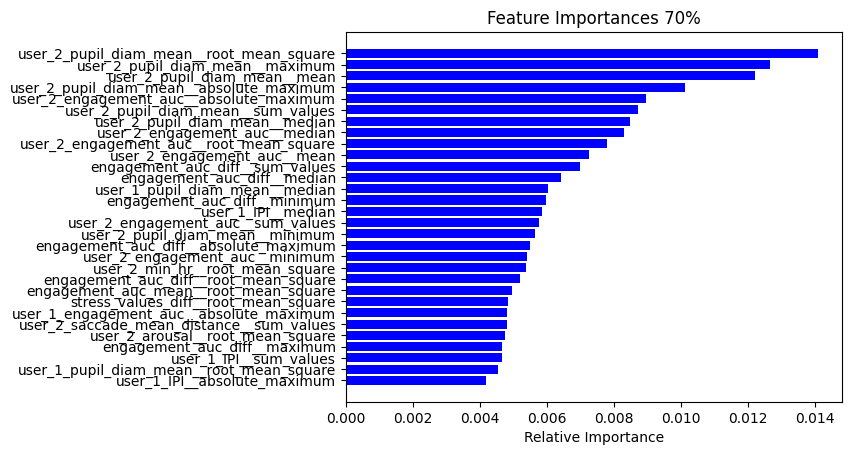

In [92]:
features = extracted_70.columns
importances = rf_70.feature_importances_

indices = np.argsort(importances)[-30:]

plt.title('Feature Importances 70%')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [152]:
X_train, X_test, y_train, y_test = train_test_split(extracted_60, Y_60['success'], test_size=0.4)

In [153]:
rf_60 = RandomForestClassifier(n_estimators=100)
rf_60.fit(X_train, y_train)

RandomForestClassifier()

In [154]:
y_pred_60 = rf_60.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_60)
sorted_features = sorted(zip(extracted_60.columns, rf_60.feature_importances_), key=lambda x: x[1])

last_30_features = sorted_features[-30:][::-1]

print("{:<5s} | {:<30s} | {:<10s}".format("Rank", "Feature", "Importance"))

# Print the separator
print("-"*50)

# Print each feature
for i, (feature, importance) in enumerate(last_30_features, start=1):
    print("{:<5d} | {:<30s} | {:<10.6f}".format(i, feature, importance))

print(accuracy)

Rank  | Feature                        | Importance
--------------------------------------------------
1     | user_2_engagement_auc__absolute_maximum | 0.014101  
2     | user_2_engagement_auc__minimum | 0.013583  
3     | user_2_engagement_auc__mean    | 0.011341  
4     | user_2_engagement_auc__median  | 0.010958  
5     | user_2_engagement_auc__sum_values | 0.010888  
6     | engagement_auc_diff__mean      | 0.010150  
7     | user_2_engagement_auc__maximum | 0.009349  
8     | user_2_engagement_auc__root_mean_square | 0.009195  
9     | engagement_auc_diff__median    | 0.008931  
10    | user_1_engagement_auc__minimum | 0.008582  
11    | engagement_auc_diff__root_mean_square | 0.008136  
12    | engagement_auc_diff__absolute_maximum | 0.008043  
13    | engagement_auc_mean__maximum   | 0.007566  
14    | user_1_engagement_auc__absolute_maximum | 0.007547  
15    | engagement_auc_diff__sum_values | 0.007501  
16    | user_1_engagement_auc__maximum | 0.007356  
17    | user_1_engag

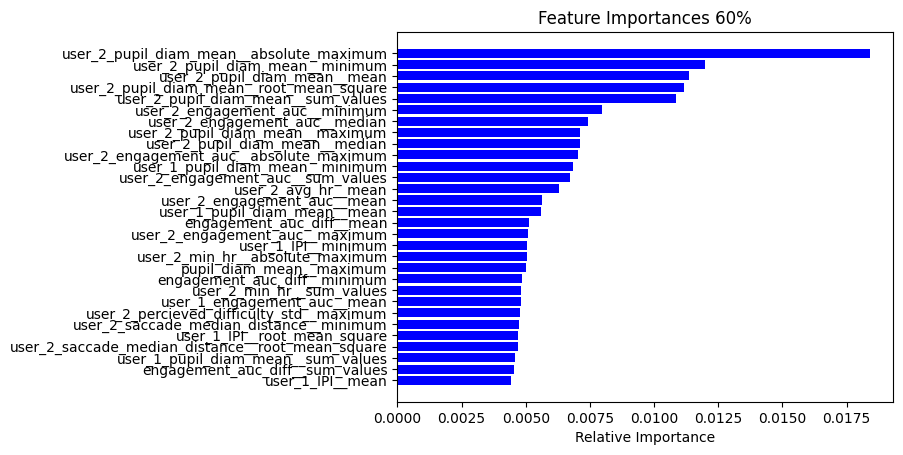

In [96]:
features = extracted_60.columns
importances = rf_60.feature_importances_

indices = np.argsort(importances)[-30:]

plt.title('Feature Importances 60%')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [158]:
X_train, X_test, y_train, y_test = train_test_split(extracted_50, Y_50['success'], test_size=0.2)

In [159]:
rf_50 = RandomForestClassifier(n_estimators=100)
rf_50.fit(X_train, y_train)

RandomForestClassifier()

In [160]:
y_pred_50 = rf_50.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_50)
sorted_features = sorted(zip(extracted_50.columns, rf_50.feature_importances_), key=lambda x: x[1])

last_30_features = sorted_features[-30:][::-1]

print("{:<5s} | {:<30s} | {:<10s}".format("Rank", "Feature", "Importance"))

# Print the separator
print("-"*50)

# Print each feature
for i, (feature, importance) in enumerate(last_30_features, start=1):
    print("{:<5d} | {:<30s} | {:<10.6f}".format(i, feature, importance))

print(accuracy)

Rank  | Feature                        | Importance
--------------------------------------------------
1     | user_2_engagement_auc__sum_values | 0.017524  
2     | user_2_engagement_auc__maximum | 0.015481  
3     | user_2_engagement_auc__minimum | 0.013332  
4     | user_1_engagement_auc__absolute_maximum | 0.011393  
5     | user_2_engagement_auc__median  | 0.010554  
6     | user_2_engagement_auc__mean    | 0.009735  
7     | user_1_engagement_auc__maximum | 0.009715  
8     | engagement_auc_diff__minimum   | 0.009607  
9     | user_2_engagement_auc__root_mean_square | 0.009395  
10    | user_2_engagement_auc__absolute_maximum | 0.008175  
11    | user_1_engagement_auc__sum_values | 0.007945  
12    | user_1_engagement_auc__median  | 0.007871  
13    | engagement_auc_diff__sum_values | 0.007515  
14    | engagement_auc_diff__root_mean_square | 0.007308  
15    | engagement_auc_mean__absolute_maximum | 0.006949  
16    | user_1_engagement_auc__root_mean_square | 0.006705  
17    | 

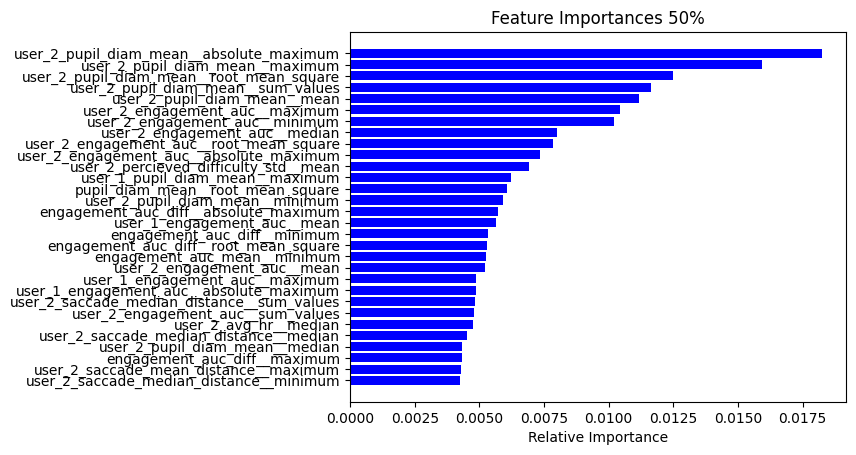

In [100]:
features = extracted_50.columns
importances = rf_50.feature_importances_

indices = np.argsort(importances)[-30:]

plt.title('Feature Importances 50%')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [164]:
X_train, X_test, y_train, y_test = train_test_split(extracted_40, Y_40['success'], test_size=0.4)

In [165]:
rf_40 = RandomForestClassifier(n_estimators=100)
rf_40.fit(X_train, y_train)

RandomForestClassifier()

In [166]:
y_pred_40 = rf_40.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_40)
sorted_features = sorted(zip(extracted_40.columns, rf_40.feature_importances_), key=lambda x: x[1])

last_30_features = sorted_features[-30:][::-1]

print("{:<5s} | {:<30s} | {:<10s}".format("Rank", "Feature", "Importance"))

# Print the separator
print("-"*50)

# Print each feature
for i, (feature, importance) in enumerate(last_30_features, start=1):
    print("{:<5d} | {:<30s} | {:<10.6f}".format(i, feature, importance))

print(accuracy)

Rank  | Feature                        | Importance
--------------------------------------------------
1     | user_2_engagement_auc__mean    | 0.010165  
2     | user_2_engagement_auc__minimum | 0.009833  
3     | user_2_engagement_auc__absolute_maximum | 0.009039  
4     | user_2_engagement_auc__root_mean_square | 0.008963  
5     | user_1_engagement_auc__root_mean_square | 0.008807  
6     | autocorrelation_1_mean__minimum | 0.008278  
7     | user_1_engagement_auc__sum_values | 0.008119  
8     | user_2_engagement_auc__median  | 0.007971  
9     | user_2_engagement_auc__maximum | 0.007944  
10    | engagement_auc_diff__root_mean_square | 0.007214  
11    | engagement_auc_diff__maximum   | 0.007055  
12    | user_1_engagement_auc__absolute_maximum | 0.007032  
13    | user_1_engagement_auc__median  | 0.006778  
14    | engagement_auc_diff__mean      | 0.006730  
15    | engagement_auc_diff__absolute_maximum | 0.006460  
16    | engagement_auc_diff__minimum   | 0.006444  
17    | eng

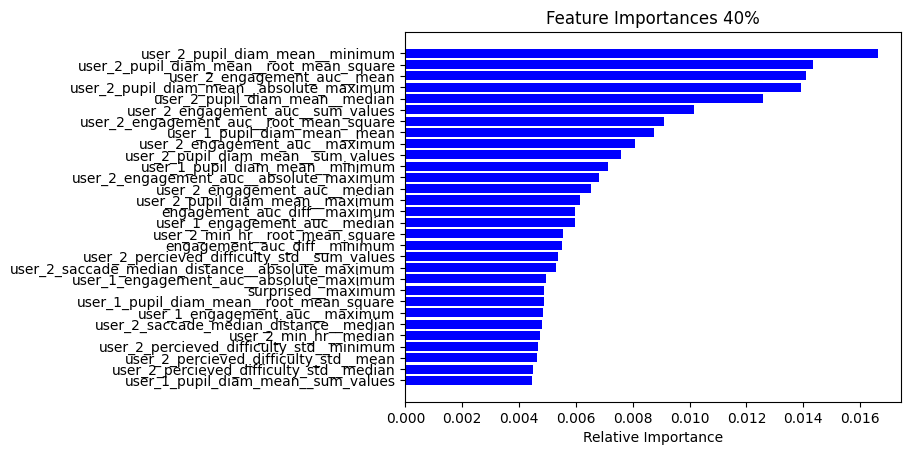

In [104]:
features = extracted_40.columns
importances = rf_40.feature_importances_

indices = np.argsort(importances)[-30:]

plt.title('Feature Importances 40%')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [173]:
X_train, X_test, y_train, y_test = train_test_split(extracted_30, Y_30['success'], test_size=0.4)

In [174]:
rf_30 = RandomForestClassifier(n_estimators=100)
rf_30.fit(X_train, y_train)

RandomForestClassifier()

In [175]:
y_pred_30 = rf_30.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_30)
sorted_features = sorted(zip(extracted_30.columns, rf_30.feature_importances_), key=lambda x: x[1])

last_30_features = sorted_features[-30:][::-1]

print("{:<5s} | {:<30s} | {:<10s}".format("Rank", "Feature", "Importance"))

# Print the separator
print("-"*50)

# Print each feature
for i, (feature, importance) in enumerate(last_30_features, start=1):
    print("{:<5d} | {:<30s} | {:<10.6f}".format(i, feature, importance))

print(accuracy)

Rank  | Feature                        | Importance
--------------------------------------------------
1     | user_2_engagement_auc__median  | 0.011298  
2     | user_2_engagement_auc__root_mean_square | 0.011247  
3     | user_2_engagement_auc__absolute_maximum | 0.010418  
4     | user_2_engagement_auc__sum_values | 0.010024  
5     | user_2_arousal__maximum        | 0.009128  
6     | user_2_engagement_auc__maximum | 0.008939  
7     | user_1_engagement_auc__sum_values | 0.008875  
8     | user_1_engagement_auc__root_mean_square | 0.008400  
9     | engagement_auc_diff__mean      | 0.008099  
10    | user_2_engagement_auc__minimum | 0.007891  
11    | user_1_pupil_diam_mean__mean   | 0.007751  
12    | user_1_engagement_auc__mean    | 0.007118  
13    | user_2_arousal__root_mean_square | 0.006954  
14    | engagement_auc_diff__minimum   | 0.006401  
15    | user_2_engagement_auc__mean    | 0.006303  
16    | pupil_diam_mean_diff__mean     | 0.006045  
17    | user_1_engagement_auc_

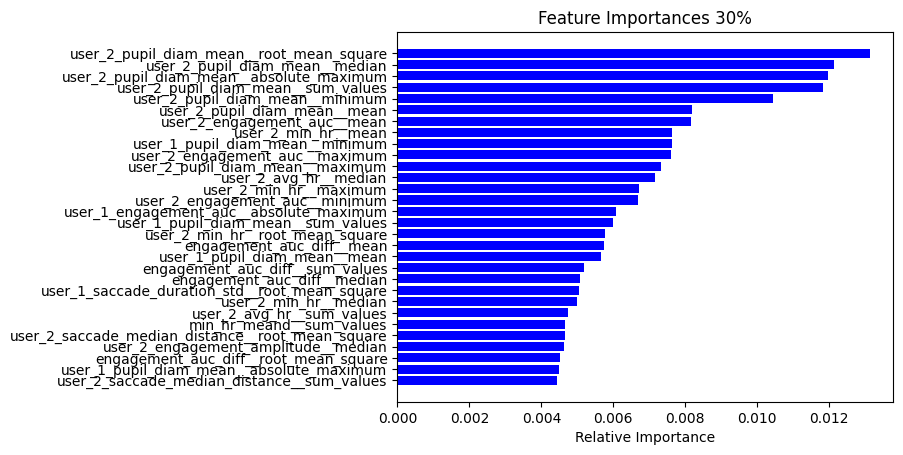

In [108]:
features = extracted_30.columns
importances = rf_30.feature_importances_

indices = np.argsort(importances)[-30:]

plt.title('Feature Importances 30%')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [179]:
X_train, X_test, y_train, y_test = train_test_split(extracted_20, Y_20['success'], test_size=0.4)

In [180]:
rf_20 = RandomForestClassifier(n_estimators=100)
rf_20.fit(X_train, y_train)

RandomForestClassifier()

In [181]:
y_pred_20 = rf_20.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_20)
sorted_features = sorted(zip(extracted_20.columns, rf_20.feature_importances_), key=lambda x: x[1])

last_30_features = sorted_features[-30:][::-1]

print("{:<5s} | {:<30s} | {:<10s}".format("Rank", "Feature", "Importance"))

# Print the separator
print("-"*50)

# Print each feature
for i, (feature, importance) in enumerate(last_30_features, start=1):
    print("{:<5d} | {:<30s} | {:<10.6f}".format(i, feature, importance))

print(accuracy)

Rank  | Feature                        | Importance
--------------------------------------------------
1     | user_2_engagement_auc__median  | 0.011209  
2     | user_2_engagement_auc__absolute_maximum | 0.009904  
3     | user_2_engagement_auc__root_mean_square | 0.009036  
4     | user_2_engagement_auc__minimum | 0.008348  
5     | user_2_engagement_auc__maximum | 0.008110  
6     | engagement_auc_diff__sum_values | 0.007782  
7     | user_1_pupil_diam_mean__median | 0.007758  
8     | user_2_engagement_amplitude__mean | 0.006635  
9     | pupil_diam_mean_diff__sum_values | 0.006287  
10    | user_2_engagement_auc__mean    | 0.006207  
11    | arousal__maximum               | 0.005821  
12    | user_1_pupil_diam_mean__minimum | 0.005702  
13    | user_1_engagement_auc__median  | 0.005351  
14    | user_1_engagement_auc__maximum | 0.005051  
15    | engagement_auc_diff__root_mean_square | 0.004999  
16    | pupil_diam_med_diff__maximum   | 0.004785  
17    | user_2_arousal__mean     

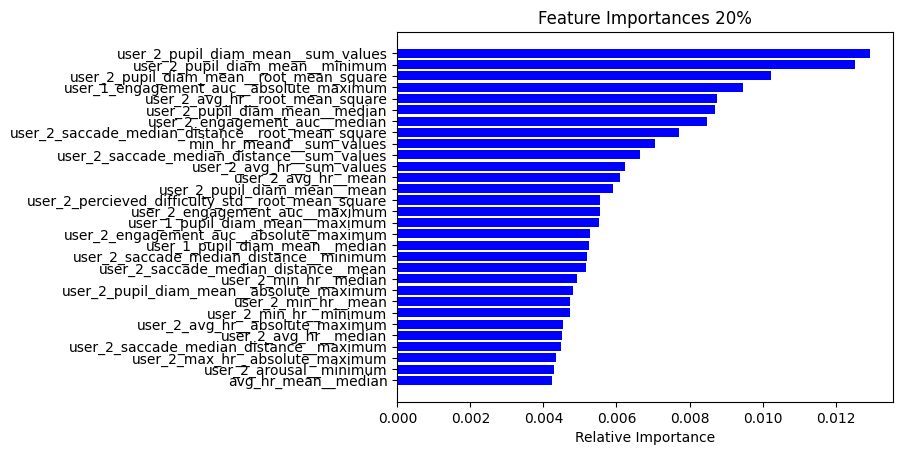

In [112]:
features = extracted_20.columns
importances = rf_20.feature_importances_

indices = np.argsort(importances)[-30:]

plt.title('Feature Importances 20%')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [182]:
X_train, X_test, y_train, y_test = train_test_split(extracted_10, Y_10['success_categorical'], test_size=0.4)

In [183]:
rf_10 = RandomForestClassifier(n_estimators=100)
rf_10.fit(X_train, y_train)

RandomForestClassifier()

In [184]:
y_pred_10 = rf_10.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_10)
sorted_features = sorted(zip(extracted_10.columns, rf_10.feature_importances_), key=lambda x: x[1])

last_30_features = sorted_features[-30:][::-1]

print("{:<5s} | {:<30s} | {:<10s}".format("Rank", "Feature", "Importance"))

# Print the separator
print("-"*50)

# Print each feature
for i, (feature, importance) in enumerate(last_30_features, start=1):
    print("{:<5d} | {:<30s} | {:<10.6f}".format(i, feature, importance))

print(accuracy)

Rank  | Feature                        | Importance
--------------------------------------------------
1     | user_2_pupil_diam_mean__minimum | 0.013535  
2     | user_2_pupil_diam_mean__median | 0.011806  
3     | user_2_pupil_diam_mean__absolute_maximum | 0.011650  
4     | user_2_saccade_median_distance__median | 0.010398  
5     | user_2_pupil_diam_mean__sum_values | 0.009744  
6     | user_2_pupil_diam_mean__maximum | 0.008525  
7     | user_2_min_hr__mean            | 0.008049  
8     | happy__absolute_maximum        | 0.007062  
9     | fixation_dispersion_diff__median | 0.006806  
10    | user_2_min_hr__median          | 0.006548  
11    | user_2_pupil_diam_mean__mean   | 0.006478  
12    | angry__minimum                 | 0.006054  
13    | user_2_min_hr__sum_values      | 0.006013  
14    | user_2_saccade_median_distance__minimum | 0.005862  
15    | saccade_median_distance__median | 0.005664  
16    | angry__median                  | 0.005330  
17    | saccade_duration_std_

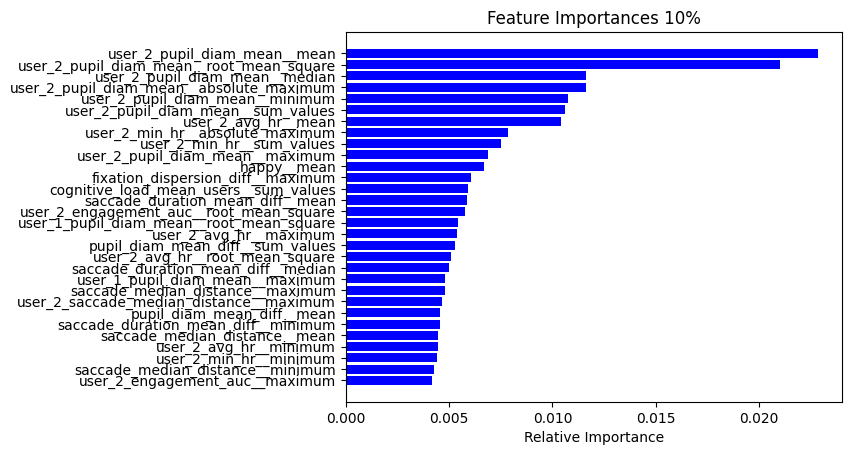

In [116]:
features = extracted_10.columns
importances = rf_10.feature_importances_

indices = np.argsort(importances)[-30:]

plt.title('Feature Importances 10%')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()